Fittando curvas aos graficos digitalizados.

/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


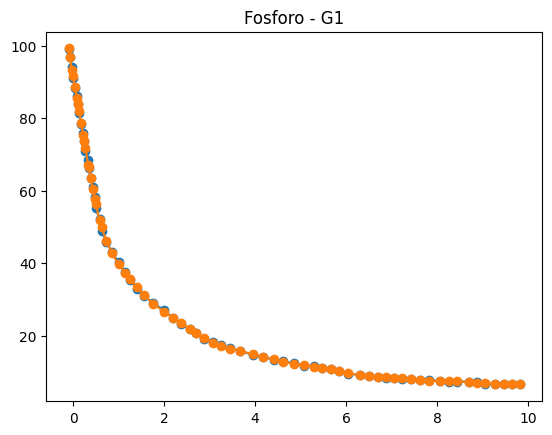

/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


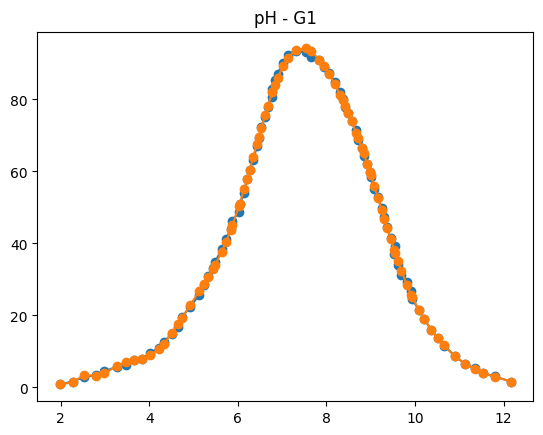

/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


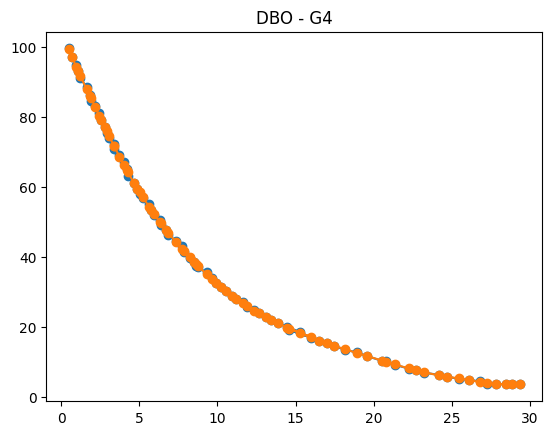

/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


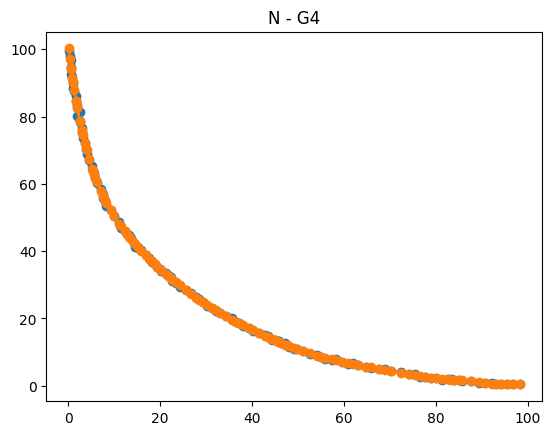

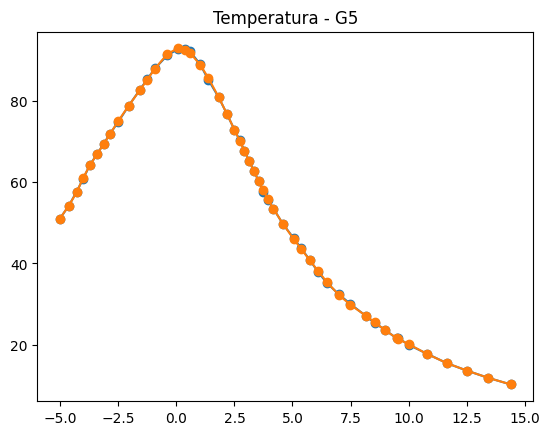

/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


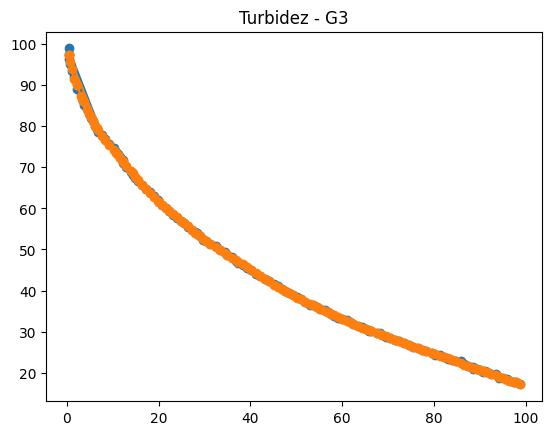

/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


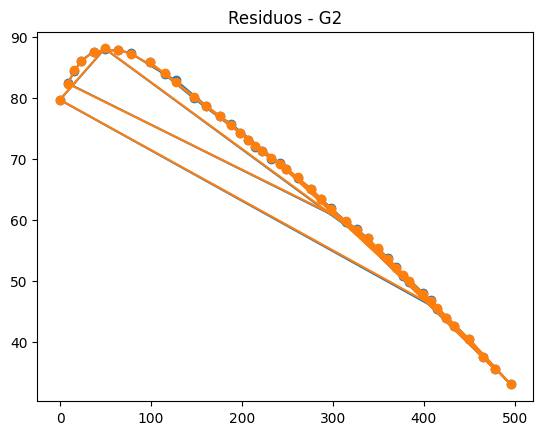

/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


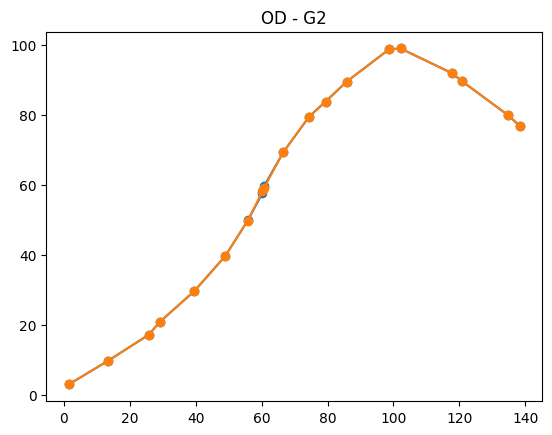

/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


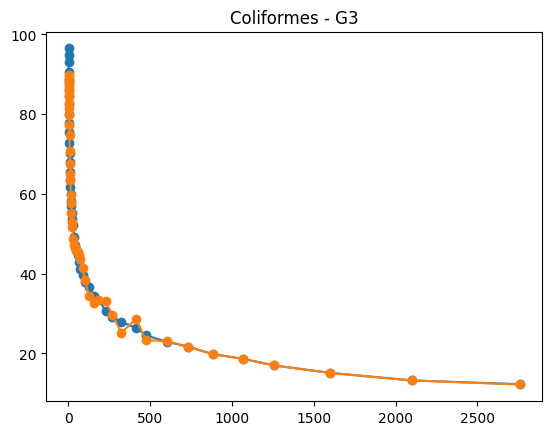

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
xl = pd.ExcelFile("Graficos Digitalizados.xlsx")
sheets = xl.sheet_names
# ['Fosforo - G1',
#  'pH - G1',
#  'DBO - G4',
#  'N - G4',
#  'Temperatura - G5',
#  'Turbidez - G3',
#  'Residuos - G2',
#  'OD - G2',
#  'Coliformes - G3']
fosforo = xl.parse(sheets[0])
ph = xl.parse(sheets[1])
dbo = xl.parse(sheets[2])
n = xl.parse(sheets[3])
temperatura = xl.parse(sheets[4])
turbidez = xl.parse(sheets[5])
residuos = xl.parse(sheets[6])
od = xl.parse(sheets[7])
coliformes = xl.parse(sheets[8])

coliformes = coliformes.iloc[:, 0:2]
od = od.tail(-1)
od = od.iloc[:, 1:]
# coliformes = coliformes.astype('float64').sort_values('x')
coliformes = coliformes.drop(coliformes.tail(11).index,inplace=False)

cols = [fosforo, ph, dbo, n, temperatura, turbidez, residuos, od, coliformes]
funcs = {}

i = 0
for indicador in cols:
    indicador.rename(columns={indicador.columns[0]: 'x', indicador.columns[1]: 'y'}, inplace=True)
    indicador = indicador.astype('float64')
    grau = 20
    coefficients = np.polyfit(indicador['x'], indicador['y'], grau)
    func = np.poly1d(coefficients)
    name = sheets[i].split(' - ')[0].lower() # to lower
    funcs[name] = func
    plt.plot(indicador['x'], indicador['y'], indicador['x'], func(indicador['x']), marker='o')
    plt.title(sheets[i])
    plt.show()
    i += 1


In [13]:
print(funcs.keys())

dict_keys(['fosforo', 'ph', 'dbo', 'n', 'temperatura', 'turbidez', 'residuos', 'od', 'coliformes'])


In [14]:
df  = pd.read_excel('SPRA04850_2017_2022.xlsx')
filtrado  = df[['Data Coleta','Parametro','Valor','Unidade']]
filtrado['Data Coleta'] = filtrado['Data Coleta'].astype('datetime64[ns]')
filtrado['Data Coleta'] = filtrado['Data Coleta'].dt.strftime('%y-%m')
filtrado.sort_values(by=['Data Coleta'], inplace=True)

/tmp/ipykernel_3685/2549625590.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtrado['Data Coleta'] = filtrado['Data Coleta'].astype('datetime64[ns]')
/tmp/ipykernel_3685/2549625590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Data Coleta'] = filtrado['Data Coleta'].astype('datetime64[ns]')
/tmp/ipykernel_3685/2549625590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [15]:
ph = filtrado.loc[filtrado['Parametro'] == 'pH']
ph['Valor'] = ph['Valor'].str.replace(",",".").astype(float)
dbo = filtrado.loc[filtrado['Parametro'] == 'DBO (5, 20)']
dbo['Valor'] = dbo['Valor'].str.replace(",",".").astype(float)
fosforo = filtrado.loc[filtrado['Parametro'] == 'Fósforo Total']
fosforo['Valor'] = fosforo['Valor'].str.replace(",",".").astype(float)
nitrogenio_t = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio Total']
nitrogenio_t['Valor'] = nitrogenio_t['Valor'].str.replace(",",".").astype(float)

/tmp/ipykernel_3685/1867526216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph['Valor'] = ph['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/1867526216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbo['Valor'] = dbo['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/1867526216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [16]:


nitrogenio_k = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio Kjeldahl']
nitrogenio_k['Valor'] = nitrogenio_k['Valor'].str.replace(",",".").astype(float)

nitrogenio_a = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio Amoniacal']
nitrogenio_a['Valor'] = nitrogenio_a['Valor'].str.replace(",",".").astype(float)


nitrogenio_ni = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio-Nitrito']
nitrogenio_ni['Valor'] = nitrogenio_ni['Valor'].str.replace(",",".").astype(float)
  

nitrogenio_na = filtrado.loc[filtrado['Parametro'] == 'Nitrogênio-Nitrato']
nitrogenio_na['Valor'] = nitrogenio_na['Valor'].str.replace(",",".").astype(float)

nitrogenio_t2 = nitrogenio_k.reset_index(drop=True)
nitrogenio_t2['Valor'] = nitrogenio_k['Valor'].reset_index(drop=True) +  nitrogenio_ni['Valor'].reset_index(drop=True) + nitrogenio_na['Valor'].reset_index(drop=True)

nitrogenio_t = pd.concat([nitrogenio_t, nitrogenio_t2], axis=0)
nitrogenio_t.sort_values(by=['Data Coleta'], inplace=True)

/tmp/ipykernel_3685/1532397611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrogenio_k['Valor'] = nitrogenio_k['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/1532397611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrogenio_a['Valor'] = nitrogenio_a['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/1532397611.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_3685/588483190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coliformes['Valor'] = coliformes['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/588483190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oxigenio['Valor'] = oxigenio['Valor'].str.replace(",",".").astype(float)
/tmp/ipykernel_3685/588483190.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Text(0.5, 1.0, 'delta Temperatura')

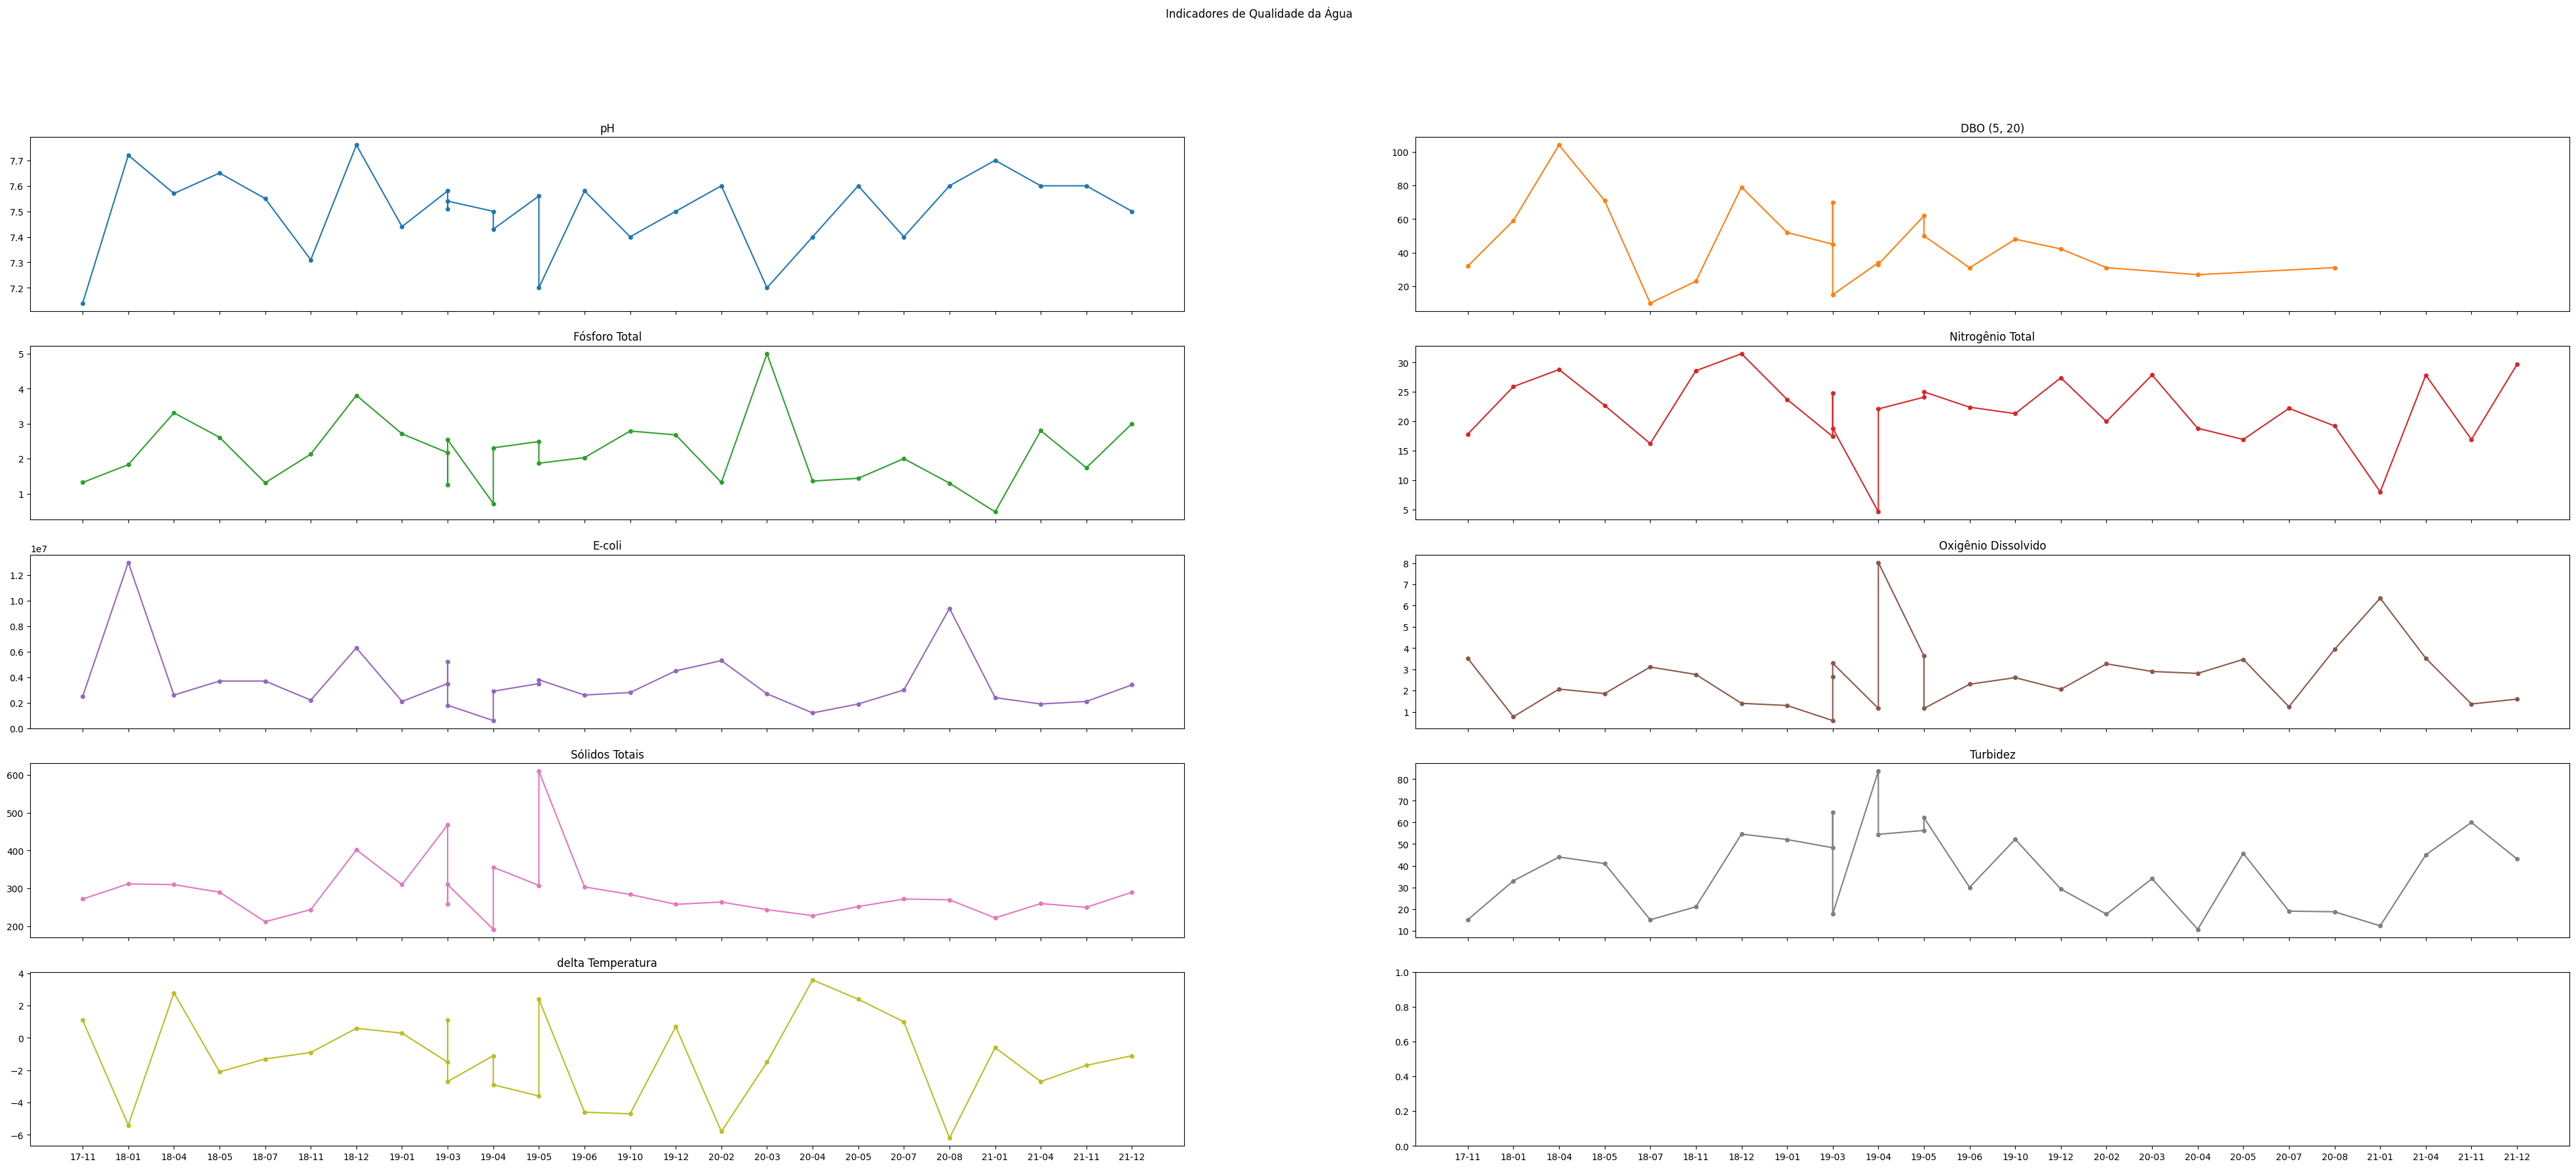

In [17]:
coliformes = filtrado.loc[filtrado['Parametro'] == "Escherichia coli**"]
coliformes['Valor'] = coliformes['Valor'].str.replace(",",".").astype(float)
oxigenio = filtrado.loc[filtrado['Parametro'] == 'Oxigênio Dissolvido']
oxigenio['Valor'] = oxigenio['Valor'].str.replace(",",".").astype(float)
solidos = filtrado.loc[filtrado['Parametro'] == "Sólido Total"]
solidos['Valor'] = solidos['Valor'].str.replace(",",".").astype(float)
turbidez = filtrado.loc[filtrado['Parametro'] == 'Turbidez']
turbidez['Valor'] = turbidez['Valor'].str.replace(",",".").astype(float)
temperatura_agua = filtrado.loc[filtrado['Parametro'] == 'Temperatura da Água']
temperatura_agua['Valor'] = temperatura_agua['Valor'].str.replace(",",".").astype(float)
temperatura_ar = filtrado.loc[filtrado['Parametro'] == 'Temperatura do Ar']
temperatura_ar['Valor'] = temperatura_ar['Valor'].str.replace(",",".").astype(float)

temperatura_delta = pd.DataFrame()
temperatura_delta['Data Coleta'] = temperatura_agua['Data Coleta'].reset_index(drop=True)

temperatura_delta["Valor"] = temperatura_agua['Valor'].reset_index(drop=True) - temperatura_ar['Valor'].reset_index(drop=True)
#plot all indicators 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axs = plt.subplots(5, 2, figsize=(50, 20), sharex=True)
fig.suptitle('Indicadores de Qualidade da Água')
axs[0, 0].plot(ph['Data Coleta'], ph['Valor'],marker='o',markersize=4)
axs[0, 0].set_title('pH')
axs[0, 1].plot(dbo['Data Coleta'], dbo['Valor'], 'tab:orange',marker='o',markersize=4)
axs[0, 1].set_title('DBO (5, 20)')
axs[1, 0].plot(fosforo['Data Coleta'], fosforo['Valor'], 'tab:green',marker='o',markersize=4)
axs[1, 0].set_title('Fósforo Total')
axs[1, 1].plot(nitrogenio_t['Data Coleta'], nitrogenio_t['Valor'], 'tab:red',marker='o',markersize=4)
axs[1, 1].set_title('Nitrogênio Total')
axs[2, 0].plot(coliformes['Data Coleta'], coliformes['Valor'], 'tab:purple',marker='o',markersize=4)
axs[2, 0].set_title('E-coli')
axs[2, 1].plot(oxigenio['Data Coleta'], oxigenio['Valor'], 'tab:brown',marker='o',markersize=4)
axs[2, 1].set_title('Oxigênio Dissolvido')
axs[3, 0].plot(solidos['Data Coleta'], solidos['Valor'], 'tab:pink',marker='o',markersize=4)
axs[3, 0].set_title('Sólidos Totais')
axs[3, 1].plot(turbidez['Data Coleta'], turbidez['Valor'], 'tab:gray',marker='o',markersize=4)
axs[3, 1].set_title('Turbidez')
axs[4, 0].plot(temperatura_delta['Data Coleta'], temperatura_delta['Valor'], 'tab:olive',marker='o',markersize=4)
axs[4, 0].set_title('delta Temperatura')


para todo dia no qual foram medidos todos os indicadores acima, inserir os valores calculados naquele dia em suas respectivas funções polinomiais treinadas e calcular o IQA daquele dia.

In [18]:
#remove points from other dfs which dont exist in dbo
#[fosforo, ph, dbo, n, temperatura, turbidez, residuos, od, coliformes]
fosforo = fosforo.loc[fosforo['Data Coleta'].isin(dbo['Data Coleta'])]
ph = ph.loc[ph['Data Coleta'].isin(dbo['Data Coleta'])]
nitrogenio_t = nitrogenio_t.loc[nitrogenio_t['Data Coleta'].isin(dbo['Data Coleta'])]
temperatura_delta = temperatura_delta.loc[temperatura_delta['Data Coleta'].isin(dbo['Data Coleta'])]
turbidez = turbidez.loc[turbidez['Data Coleta'].isin(dbo['Data Coleta'])]
solidos = solidos.loc[solidos['Data Coleta'].isin(dbo['Data Coleta'])]
oxigenio = oxigenio.loc[oxigenio['Data Coleta'].isin(dbo['Data Coleta'])]
coliformes = coliformes.loc[coliformes['Data Coleta'].isin(dbo['Data Coleta'])]

#create dfs with all indicators as columns
total_df = pd.DataFrame()
total_df['Data Coleta'] = dbo['Data Coleta'].reset_index(drop=True)
total_df['dbo'] = dbo["Valor"].reset_index(drop=True)
total_df['ph'] = ph["Valor"].reset_index(drop=True)
total_df['fosforo'] = fosforo["Valor"].reset_index(drop=True)
total_df['n'] = nitrogenio_t["Valor"].reset_index(drop=True)
total_df['temperatura'] = temperatura_delta["Valor"].reset_index(drop=True)
total_df['turbidez'] = turbidez["Valor"].reset_index(drop=True)
total_df['residuos'] = solidos["Valor"].reset_index(drop=True)
total_df['od'] = oxigenio["Valor"].reset_index(drop=True)
total_df['coliformes'] = coliformes["Valor"].reset_index(drop=True)
#['fosforo', 'ph', 'dbo', 'n', 'temperatura', 'turbidez', 'residuos', 'od', 'coliformes']

In [19]:
# ['Fosforo - G1',
#  'pH - G1',
#  'DBO - G4',
#  'N - G4',
#  'Temperatura - G5',
#  'Turbidez - G3',
#  'Residuos - G2',
#  'OD - G2',
#  'Coliformes - G3']
weights = {"fosforo":0.1, "ph":0.12, "dbo":0.10, "n":0.10, "temperatura":0.10, "turbidez":0.08, "residuos":0.08, "od":0.17, "coliformes":0.15}
def calculaIQA(df):
#
    for i in range(len(df)):
        line = df.iloc[i]
        iqa = 1
        for column in df.columns[1:10]:
            # iqa *= funcs[sheets[i]](line[column])**weights[i]
            # print(funcs[sheets[i]](line[column]))
            print(column)
            print(funcs[column](line[column]))
        
        
    
calculaIQA(total_df)
# total_df



dbo
671.6146650806179
ph
91.72148555831518
fosforo
34.62693648179649
n
37.44920204779578
temperatura
88.22616597124603
turbidez
67.54400820467208
residuos
65.62519967135104
od
1893.4292843909052
coliformes
-2.5999389473699932e+72
dbo
6431900348459.068
ph
92.64254555932712
fosforo
28.182486074562654
n
28.118833104609763
temperatura
-30.4542093633885
turbidez
50.016800452768855
residuos
60.135986066423726
od
-1548.3289567454303
coliformes
-5.436887013257353e+86
dbo
9.327950606596954e+18
ph
93.94530069845496
fosforo
16.978973788429514
n
25.31971261945104
temperatura
69.21360850552426
turbidez
42.262060885568495
residuos
60.378687785799876
od
903.1799099683931
coliformes
-5.696986748531158e+72
dbo
873231260087729.4
ph
93.36033705313457
fosforo
21.5335699564082
n
31.486751305645
temperatura
78.42357424281113
turbidez
44.451606559876275
residuos
63.05696670730369
od
631.616145653692
coliformes
-6.611898557428746e+75
dbo
32.35745915214295
ph
94.04912450304255
fosforo
34.776008252980134
n
39.6